In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from functions import *

DATA_DIR = '../data'

In [2]:
df = pd.read_json(f'{DATA_DIR}/quotebank_attr_2015-2020.json.bz2', compression='bz2')
preprocess_dataframe(df, handle_birth_dates=True)

In [3]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,None,None,NaT,None,None,None,None,[southwales-eveningpost.co.uk]
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,None,None,NaT,None,None,None,None,[irishexaminer.com]
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,None,None,NaT,None,None,None,None,[ufl.edu]
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,NaN,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,None,None,NaT,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard...."
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],1966-07-07,None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com]


In [4]:
df_sentiments = extend_with_sentiment_polarity_scores(df)

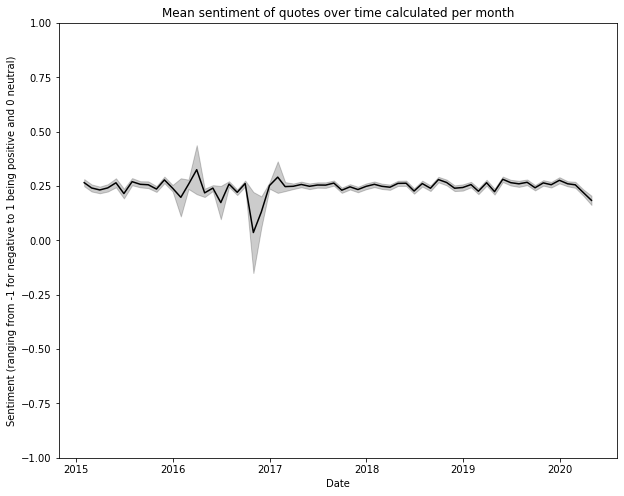

In [5]:
compound_per_month = group_by_date_col(df_sentiments, 'date', freq='M')\
    .agg({'compound': ['mean', 'sem'] })\
    .reset_index()

fig, ax = plt.subplots(figsize=(10, 8))
show_mean_with_sem(ax, 
    compound_per_month['date'], 
    compound_per_month['compound']['mean'], 
    compound_per_month['compound']['sem'], 
    color='black')
ax.set(title='Mean sentiment of quotes over time calculated per month',
    xlabel='Date', ylabel='Sentiment (ranging from -1 for negative to 1 being positive and 0 neutral)')
plt.ylim([-1, 1])
plt.show()

# Professions

In [6]:
df_sentiments.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,...,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,neg,neu,pos,compound
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,...,NaT,None,None,None,None,[southwales-eveningpost.co.uk],0.000,0.630,0.370,0.5707
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,...,NaT,None,None,None,None,[irishexaminer.com],0.000,1.000,0.000,0.0000
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,...,NaT,None,None,None,None,[ufl.edu],0.000,0.739,0.261,0.8020
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,NaN,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,...,NaT,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard....",0.056,0.706,0.238,0.8004
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,...,1966-07-07,None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com],0.000,1.000,0.000,0.0000


In [60]:
import matplotlib.patches as mpatches

def show_attr_sentiment_evolution(df, attr_name, cutoff, top_k, freq):
    """Plots sentiment over time for attribute attr_name over time for values
    over the given frequency appearing at least cutoff times in the whole dataset
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    colors = ['blue', 'red', 'green', 'black', 'brown', 'orange']
    handles = []
    for i, value in enumerate(get_top_entries(df_sentiments, attr_name, cutoff_count=cutoff, top_k=top_k)):
        val_df = df[get_multivalue_col_mask(df, attr_name, value)]

        attr_compound_evolution = group_by_date_col(val_df, 'date', freq=freq)\
            .agg({'compound': ['mean', 'sem'] })\
            .reset_index()
        color = colors[i % len(colors)]
        handles.append(mpatches.Patch(color=color, label=value))

        show_mean_with_sem(ax, 
            attr_compound_evolution['date'], 
            attr_compound_evolution['compound']['mean'], 
            attr_compound_evolution['compound']['sem'], 
            color=color,
            alpha=0.05)
    ax.set(title=f'Mean sentiment of quotes over time calculated per month for attribute \'{attr_name}\'',
        xlabel='Date', ylabel='Sentiment (ranging from -1 for negative to 1 being positive and 0 neutral)')
    ax.legend(handles=handles, title=f'Attribute value')
    plt.ylim([-1, 1])
    plt.show()

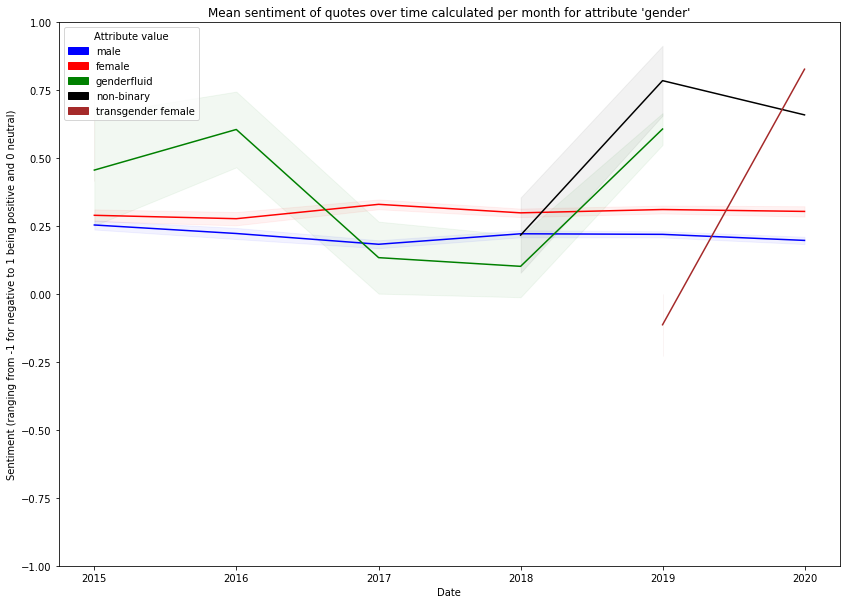

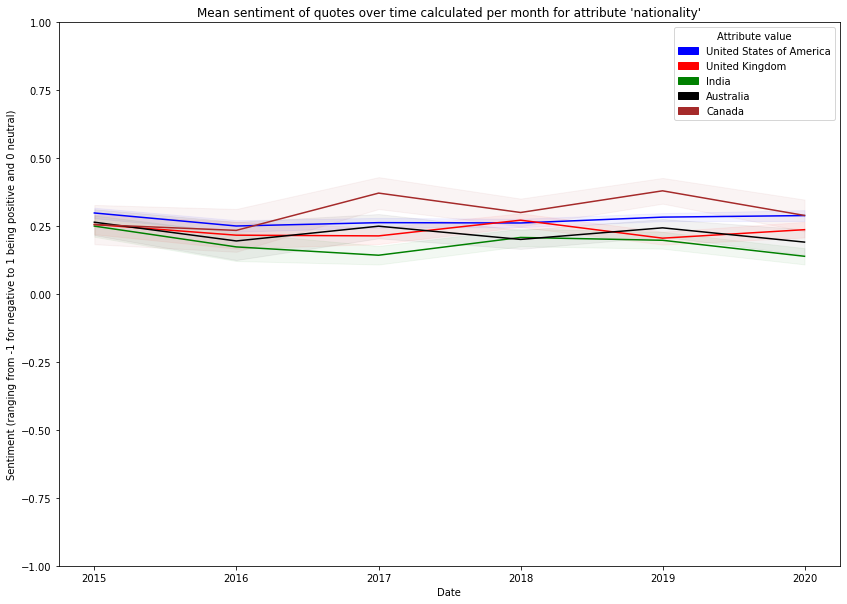

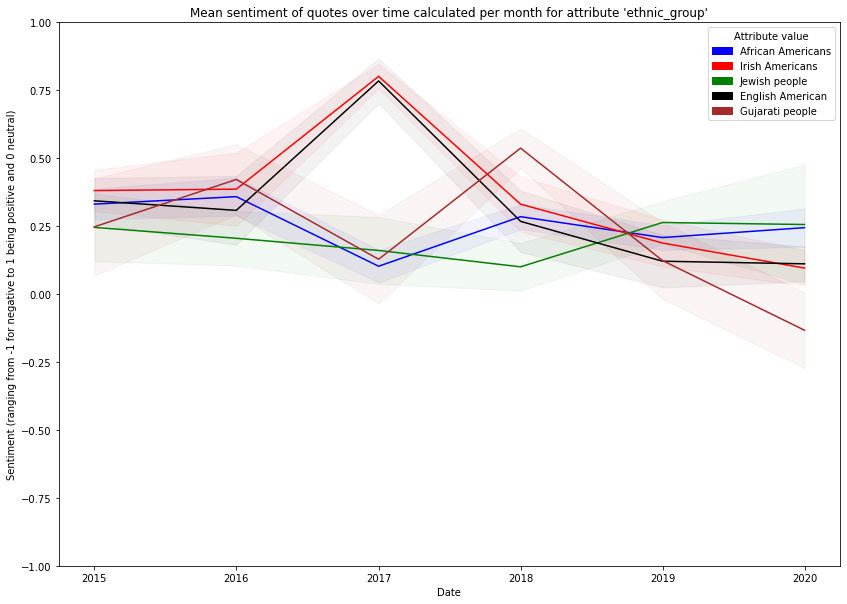

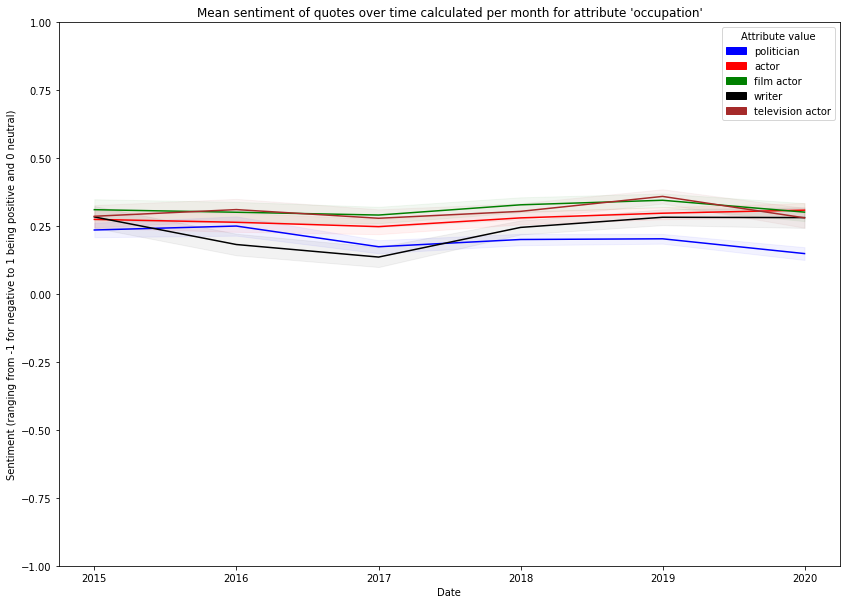

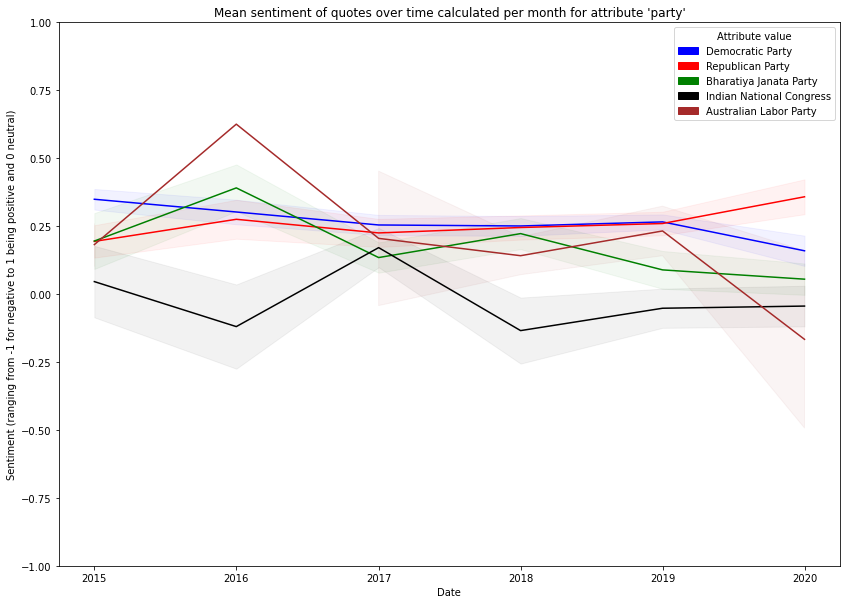

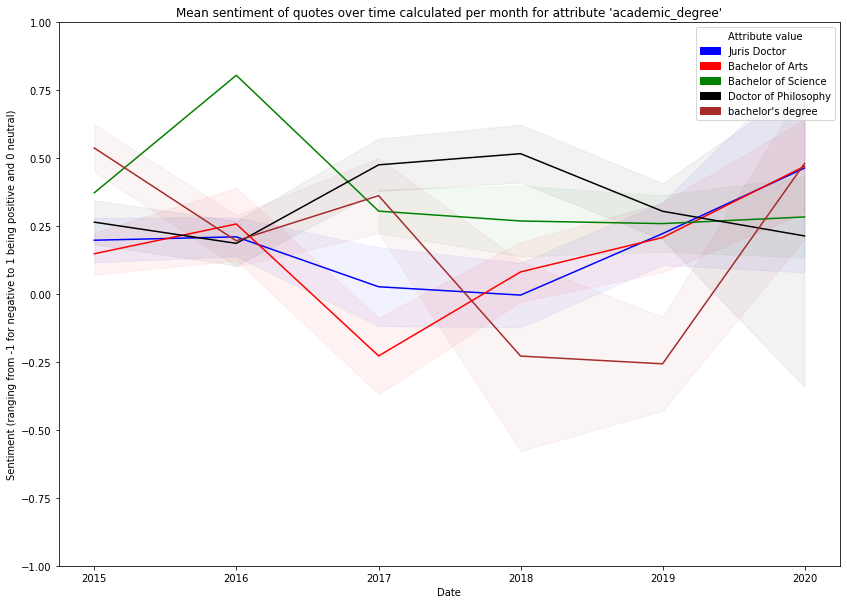

In [61]:
cols_to_visualize_sentiment_evolution = ['gender', 'nationality',
       'ethnic_group', 'occupation', 'party',
       'academic_degree']
for attr_name in cols_to_visualize_sentiment_evolution:
    show_attr_sentiment_evolution(df_sentiments, attr_name=attr_name, cutoff=-1, top_k=5, freq='YS')

### Hypothesis testing of diffrences

We see an apparent differences between some values of certain attributes in the above plots so we're doing hypothesis testing to check statistical significance of these differences. It makes little sense doing hypothesis testing on distributions with small number of samples, which is in above plots usually characterized by a large confidence interval, so focus mainly on distributions with a large sample size:

In [9]:
def get_attr_comparator(sentiments_per_attr):
    """Factory that creates a function that compared means of different values of an 
    attribute on a given sentiment array
    """
    def f(attr_name, value1, value2):
        """Perform hypothesis testing of means of sentiment compounds of entries with 
        values value1 and value2 for attr_name
        """
        print('Testing hypothesis that means of sentiment compounds of values '\
              f'{value1} and {value2} for attribute {attr_name} are drawn from the same distribution:')
        perform_hypothesis_testing_of_means(
            sentiments_per_attr[attr_name][value1], sentiments_per_attr[attr_name][value2])
    return f

In [10]:
to_check_sentiment_cols = ['gender', 'nationality',
       'ethnic_group', 'occupation', 'party',
       'academic_degree']

attr_sentiments = {
    attr_name: {
        value: df_sentiments[get_multivalue_col_mask(df_sentiments, attr_name, value)]['compound']\
        for value in get_top_entries(df_sentiments, attr_name)
    }\
    for attr_name in to_check_sentiment_cols
}

In [11]:
compare_attr_values = get_attr_comparator(attr_sentiments)

We first compare how similar are sentiments of male and female speakers, and as we can see their sentiments are different with high statistical significance with females likely having more positive average sentiment from the plots above:

In [12]:
compare_attr_values('gender', 'male', 'female')

Testing hypothesis that means of sentiment compounds of values male and female for attribute gender are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 1.2358374156959785e-21
 ----| Welch’s t-test p-value: 4.7302865062341435e-22
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]


We do the same for actors and politians and see their difference is also statistically significant with actors likely having more positive average sentiment from the plots above:

In [13]:
compare_attr_values('occupation', 'actor', 'politician')

Testing hypothesis that means of sentiment compounds of values actor and politician for attribute occupation are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 7.578712064130518e-09
 ----| Welch’s t-test p-value: 5.397353612667226e-09
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]


We repeat the same for nationality and compare India which on first sight have much lower average sentiment compound than other countries and hypothesis testing confirms that a difference in fact likely exists:

In [14]:
for country2 in ['United States of America', 'United Kingdom', 'Australia', 'Canada']:
    compare_attr_values('nationality', 'India', 'United States of America')

Testing hypothesis that means of sentiment compounds of values India and United States of America for attribute nationality are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 1.3297094185288136e-09
 ----| Welch’s t-test p-value: 9.674985677112454e-09
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]
Testing hypothesis that means of sentiment compounds of values India and United States of America for attribute nationality are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 1.3297094185288136e-09
 ----| Welch’s t-test p-value: 9.674985677112454e-09
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]
Testing hypothesis that means of sentiment compounds of values India and United States of America for attribute nationality are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 1.329709418528813

As a sanity check we compare Canada and UK with USA and see that in case of UK and USA p-value is higher which suggests the distribution are more likely to be same than in case of India, but still with small probability. In case of Canada and USA, we can't reject the null hypothesis so easy anymore!

In [15]:
compare_attr_values('nationality', 'United Kingdom', 'United States of America')
compare_attr_values('nationality', 'Canada', 'United States of America')

Testing hypothesis that means of sentiment compounds of values United Kingdom and United States of America for attribute nationality are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.003436957803287688
 ----| Welch’s t-test p-value: 0.004308153974238263
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]
Testing hypothesis that means of sentiment compounds of values Canada and United States of America for attribute nationality are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.06177940930966209
 ----| Welch’s t-test p-value: 0.07189052743955478
 ====> Conclusion: The equality of the expected values of the given distributions is [UNDECIDABLE]


#### Changes of testing over time

We now look for evolution of sentiment compound over time for a fixed value of a certain attribute.

In [44]:
def compare_over_years(df, attr_name, value, year1, year2):
    """Compare sentiment compound of entries with value in place of attr_name 
    in years year1 and year2
    """
    attr_val_df = df[get_multivalue_col_mask(df, attr_name, value)]
    attr_val_df = pd.concat([
        attr_val_df['date'].apply(lambda d: d.year).rename('date'),
        attr_val_df['compound']
    ], axis=1)
    
    distribution1 = attr_val_df[attr_val_df['date'] == year1]['compound']
    distribution2 = attr_val_df[attr_val_df['date'] == year2]['compound']
    print(f'Testing hypothesis that means of sentiment compounds of value {value} of {attr_name} '\
          f'in years {year1} and {year2} are drawn from the same distribution:')
    perform_hypothesis_testing_of_means(distribution1, distribution2)

In plots we can see that writers have a dip in 2017 and we test this and confirm the difference between 2015 and 2017 as well as 2017 and 2020 is statistically significant in sentiment, while 2015 and 2020 are far more likely to be drawn from the same distribution under the null hypothesis:

In [53]:
compare_over_years(df_sentiments, 'occupation', 'writer', 2015, 2017)
compare_over_years(df_sentiments, 'occupation', 'writer', 2017, 2020)
compare_over_years(df_sentiments, 'occupation', 'writer', 2015, 2020)

Testing hypothesis that means of sentiment compounds of value writer of occupation in years 2015 and 2017 are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.008160463426982538
 ----| Welch’s t-test p-value: 0.006684922922697378
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]
Testing hypothesis that means of sentiment compounds of value writer of occupation in years 2017 and 2020 are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.0070657966046388035
 ----| Welch’s t-test p-value: 0.006232086368771236
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]
Testing hypothesis that means of sentiment compounds of value writer of occupation in years 2015 and 2020 are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.9634892652243279
 ----| Welch’s t-test p-value: 0.9634518952812231
 ====> 

In the plots it may seem that politician's sentiment may be slowly dropping, but hypothesis testing show that we can't high confidence confirm that this drop is the case on year er year basis, but let's compare ends of the interval:

In [54]:
for year in range(2015, 2020):
    compare_over_years(df_sentiments, 'occupation', 'politician', year, year + 1)

Testing hypothesis that means of sentiment compounds of value politician of occupation in years 2015 and 2016 are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.7426744025465919
 ----| Welch’s t-test p-value: 0.7436119424030698
 ====> Conclusion: The equality of the expected values of the given distributions is [UNDECIDABLE]
Testing hypothesis that means of sentiment compounds of value politician of occupation in years 2016 and 2017 are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.0792408123869532
 ----| Welch’s t-test p-value: 0.07633026502005223
 ====> Conclusion: The equality of the expected values of the given distributions is [UNDECIDABLE]
Testing hypothesis that means of sentiment compounds of value politician of occupation in years 2017 and 2018 are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.4047667644551889
 ----| Welch’s t-test p-value: 0.40419636199716

Even when looking at opposing ends of the interval we can confidently confirm that this drop is statistically significant:

In [55]:
compare_over_years(df_sentiments, 'occupation', 'politician', 2015, 2020)

Testing hypothesis that means of sentiment compounds of value politician of occupation in years 2015 and 2020 are drawn from the same distribution:
 ----| Standard independent 2 sample test p-value: 0.014574176241330401
 ----| Welch’s t-test p-value: 0.014744408868722593
 ====> Conclusion: The equality of the expected values of the given distributions is [UNLIKELY]


## Empathy analysis

Next we look at evolution of different emotions in the quotations over past few years:

In [95]:
from empath import Empath
lexicon = Empath()

In [96]:
lexicon.cats.keys()

dict_keys(['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic

In [126]:
def empath_analysis_per_year(df, categories_to_analyze, lexicon):
    """Returns dataframe of percentage of each of specified emotional categories 
    on per-year basis between 2015 and 2020
    """
    years = list(range(2015, 2021))
    result_per_year = []
    for year in years:
        mask = df['date'].apply(lambda d: d.year == year)
        target_quotation_list = list(df[mask]['quotation'])
        result_per_year.append({
            'year': year,
            **lexicon.analyze(target_quotation_list, categories_to_analyze, normalize=True)
        })
    return pd.DataFrame(result_per_year).set_index('year')

In [146]:
categories = ['plant', 'animal', 'healthy_food', 'pet', 'kill', 'aggression', 'social_media', 'suffering', 'water', 'fear', 'death', 'children']
data = empath_analysis_per_year(df, categories, lexicon)
data

,plant,animal,healthy_food,pet,kill,aggression,social_media,suffering,water,fear,death,children
year,,,,,,,,,,,,
2015,0.009170,0.002890,0.009143,0.000885,0.000852,0.000897,0.000891,0.001260,0.002446,0.000355,0.001439,0.003465
2016,0.009566,0.002858,0.008373,0.001061,0.000757,0.000770,0.001044,0.001202,0.002191,0.000560,0.001151,0.003474
2017,0.009184,0.002823,0.008099,0.001038,0.000800,0.000852,0.001042,0.001406,0.002199,0.000477,0.001472,0.003693
2018,0.008439,0.002824,0.007116,0.000976,0.000879,0.000953,0.001142,0.001224,0.002236,0.000565,0.001399,0.003420
2019,0.007946,0.002821,0.006353,0.001202,0.000700,0.000946,0.001170,0.001319,0.001988,0.000583,0.001242,0.003110
2020,0.007109,0.002733,0.007169,0.001109,0.000786,0.000904,0.001294,0.001162,0.001835,0.000541,0.001274,0.002568


In [166]:
def display_category_evolution(data, categories, ax_set_dict=None, top_k= 0):
    x_col = 'year'
    if top_k > 0:
        top_k_y_cols = data[categories].max(axis=0).sort_values(ascending=False)[:top_k].index
    else:
        top_k_y_cols = categories

    fig, ax = plt.subplots(figsize=(14, 10))
    for y_col in top_k_y_cols:
        sns.lineplot(data=data, x=x_col, y=y_col, ax=ax)
    if ax_set_dict is not None:
        ax.set(**ax_set_dict)
    ax.legend(top_k_y_cols)
    plt.show()

First let's look at evolution of each emotion with their overall frequency taken into account:

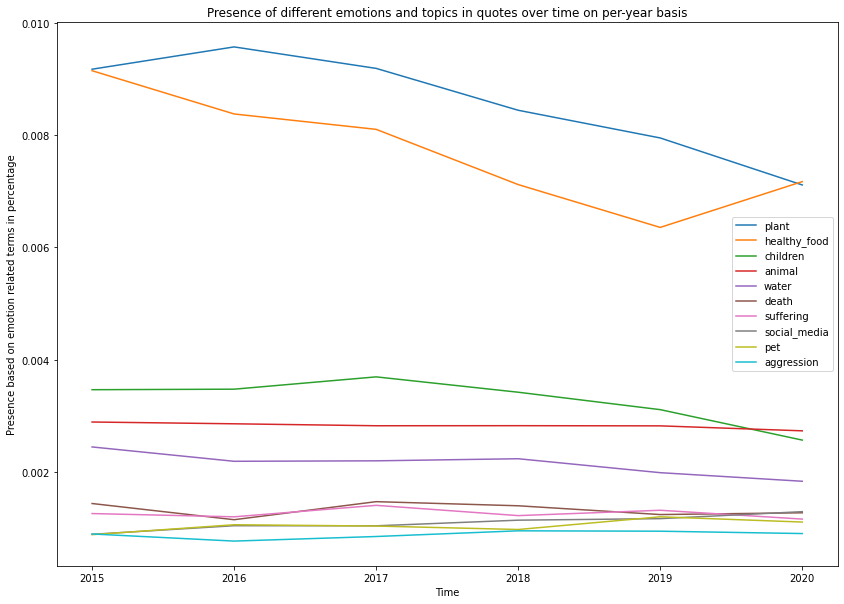

In [168]:
display_category_evolution(data, categories, ax_set_dict={
    'title': 'Presence of different emotions and topics in quotes over time on per-year basis',
    'xlabel': 'Time', 
    'ylabel': 'Presence based on emotion related terms in percentage' 
}, top_k=10)

Now, let's normalize each column to look at evolution of each emotion over time:

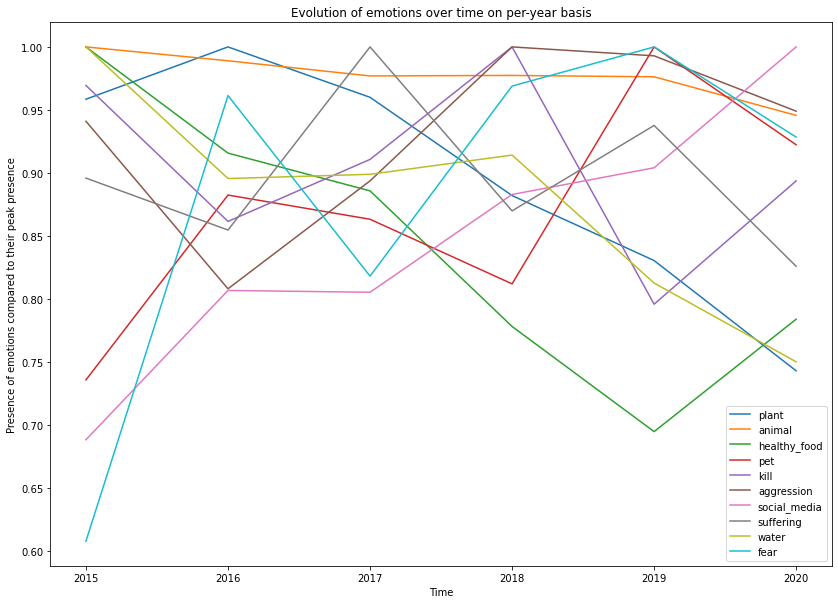

In [173]:
normalized_per_col_data = data / data.max(axis=0)
display_category_evolution(normalized_per_col_data, categories, ax_set_dict={
    'title': 'Evolution of emotions over time on per-year basis',
    'xlabel': 'Time', 
    'ylabel': 'Presence of emotions compared to their peak presence' 
}, top_k=10)